In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
import sklearn.datasets
from sklearn.neighbors import KNeighborsRegressor
import os

In [34]:
df = pd.read_csv("Resources/rating.csv", error_bad_lines=False)
df.head()

b'Skipping line 66: expected 44 fields, saw 46\nSkipping line 111: expected 44 fields, saw 45\nSkipping line 198: expected 44 fields, saw 45\nSkipping line 222: expected 44 fields, saw 46\nSkipping line 278: expected 44 fields, saw 45\nSkipping line 396: expected 44 fields, saw 45\nSkipping line 403: expected 44 fields, saw 45\nSkipping line 421: expected 44 fields, saw 45\nSkipping line 437: expected 44 fields, saw 45\nSkipping line 462: expected 44 fields, saw 46\nSkipping line 491: expected 44 fields, saw 45\nSkipping line 515: expected 44 fields, saw 45\nSkipping line 529: expected 44 fields, saw 45\nSkipping line 530: expected 44 fields, saw 45\nSkipping line 558: expected 44 fields, saw 45\nSkipping line 623: expected 44 fields, saw 45\nSkipping line 646: expected 44 fields, saw 45\nSkipping line 663: expected 44 fields, saw 46\nSkipping line 713: expected 44 fields, saw 45\nSkipping line 730: expected 44 fields, saw 47\nSkipping line 791: expected 44 fields, saw 45\nSkipping lin

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# Getting all columns names

df.columns

df.dropna(inplace=True)
df.columns


Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split
y = df["imdbRating"]
X = df.drop(columns=["imdbRating", 'fn', 'tid', 'title', 'wordsInTitle', 'url', 'type'])
X.dtypes
X = X.replace([np.inf, -np.inf], np.nan)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
X.head()

,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,40550.0,3240.0,1921.0,1,0,19,96,85,3,0,...,0,0,0,0,0,0,0,0,0,0
1,45319.0,5700.0,1925.0,2,1,35,110,122,3,0,...,0,0,0,0,0,0,0,0,0,0
2,81007.0,9180.0,1927.0,3,4,67,428,376,2,0,...,0,0,0,1,0,0,0,0,0,0
3,37521.0,6420.0,1926.0,1,1,53,123,219,3,1,...,0,0,0,0,0,0,0,0,0,0
4,70057.0,5220.0,1931.0,2,0,38,187,186,3,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

In [40]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
X_train_scaled

array([[9.62066605e-03, 1.18395275e-01, 6.98412698e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19030920e-02, 8.94470599e-02, 8.09523810e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.19454280e-03, 8.76926226e-02, 7.77777778e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.13219649e-04, 2.62873183e-02, 9.76190476e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.64156364e-03, 5.26038773e-02, 9.36507937e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.88625897e-01, 7.97976549e-02, 9.92063492e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

k: 1, Train/Test Score: 0.999/-0.536
k: 3, Train/Test Score: 0.481/-0.061
k: 5, Train/Test Score: 0.366/0.024
k: 7, Train/Test Score: 0.313/0.054
k: 9, Train/Test Score: 0.281/0.078
k: 11, Train/Test Score: 0.264/0.091
k: 13, Train/Test Score: 0.246/0.098
k: 15, Train/Test Score: 0.235/0.105
k: 17, Train/Test Score: 0.224/0.110
k: 19, Train/Test Score: 0.215/0.111


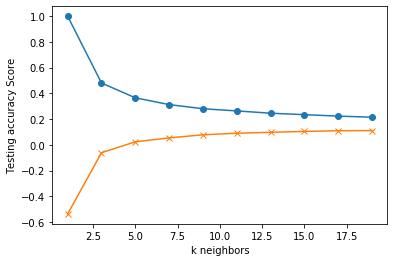

In [43]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('KNN.png')
plt.show()